For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank
to try and identify the relationship between the GDP and life expectancy of six countries.

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Import libraries as needed, inspect and clean up data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_1samp
from scipy.stats import binom_test
import scipy.stats as stats


data = pd.read_csv('all_data.csv')

print(data['Country'].unique())
print(data.columns)


data['gdp_billions'] = round(data['GDP'] / 1000000000)
data['gdp_billions'] = data['gdp_billions'].astype("int64")
data.rename(columns = {'Life expectancy at birth (years)':'life_expect'}, inplace = True)

#data check
print(data.info())
print('too small', data.life_expect[data.life_expect < 10])

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       96 non-null     object 
 1   Year          96 non-null     int64  
 2   life_expect   96 non-null     float64
 3   GDP           96 non-null     float64
 4   gdp_billions  96 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.9+ KB
None
too small Series([], Name: life_expect, dtype: float64)


Plot relationship between life expectancy and gdp for Chile

278


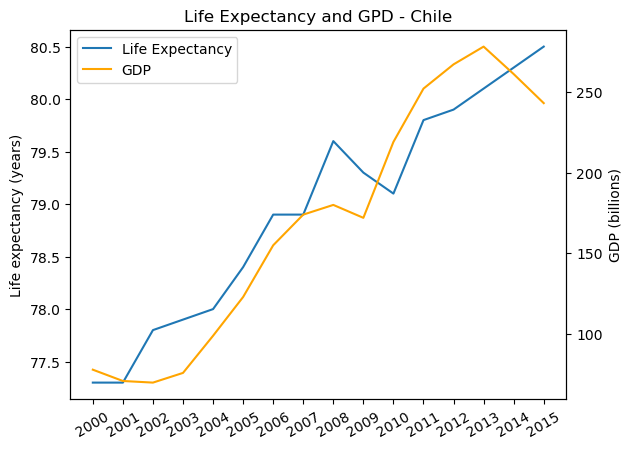

<Figure size 640x480 with 0 Axes>

In [3]:
chile_data = data[data['Country'] == 'Chile']
print(chile_data.gdp_billions.max())
#plt.figure(figsize = (12,8))
fig, ax1 = plt.subplots()
line_1 = ax1.plot(chile_data.Year, chile_data['life_expect'], label = 'Life Expectancy')
plt.ylabel('Life expectancy (years)')

ax2 = ax1.twinx()
line_2 = ax2.plot(chile_data.Year, chile_data.gdp_billions, color = 'orange', label = 'GDP')
ax2.set_ylabel('GDP (billions)')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: format(int(x), ',')))

lines = line_1 + line_2
labels = [line.get_label() for line in lines]

plt.title('Life Expectancy and GPD - Chile')
ax1.legend(lines, labels ,loc = 'upper left')
ax1.set_xticks(chile_data.Year)
ax1.set_xticklabels(labels = chile_data.Year, rotation = 30)
plt.show()
plt.clf()

That seemed like a lot of work, is there a better way to visualise this for each country?

     Country  Year  life_expect           GDP  gdp_billions
80  Zimbabwe  2000         46.0  6.689958e+09             7
81  Zimbabwe  2001         45.3  6.777385e+09             7
82  Zimbabwe  2002         44.8  6.342116e+09             6
83  Zimbabwe  2003         44.5  5.727592e+09             6
84  Zimbabwe  2004         44.3  5.805598e+09             6


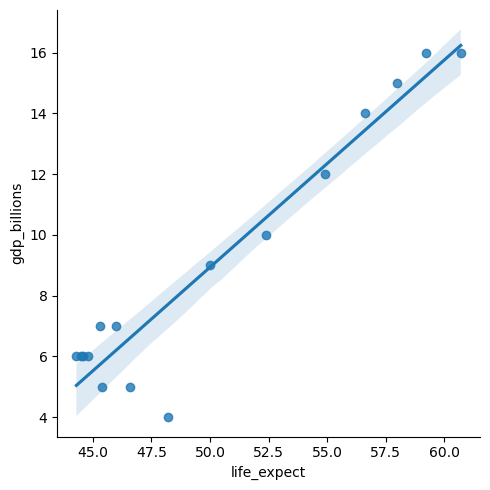

<Figure size 640x480 with 0 Axes>

In [5]:
zimbabwe_data = data[data['Country'] == 'Zimbabwe']
print(zimbabwe_data.head())

sns.lmplot(x = 'life_expect', y = 'gdp_billions', data = zimbabwe_data)
plt.show()
plt.clf()

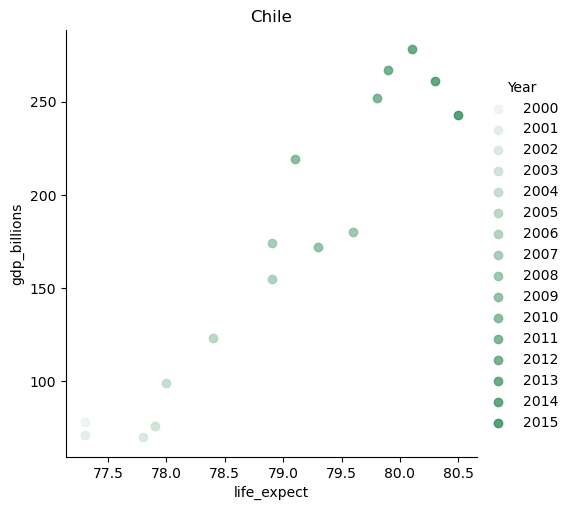

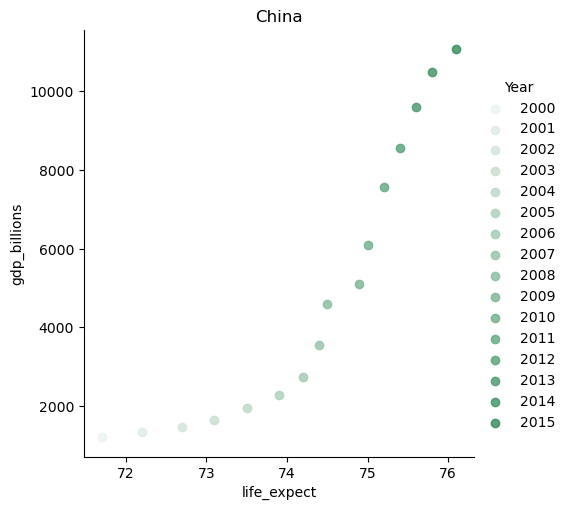

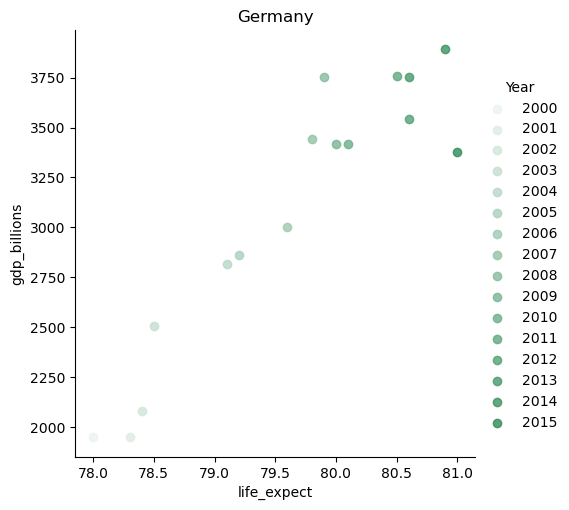

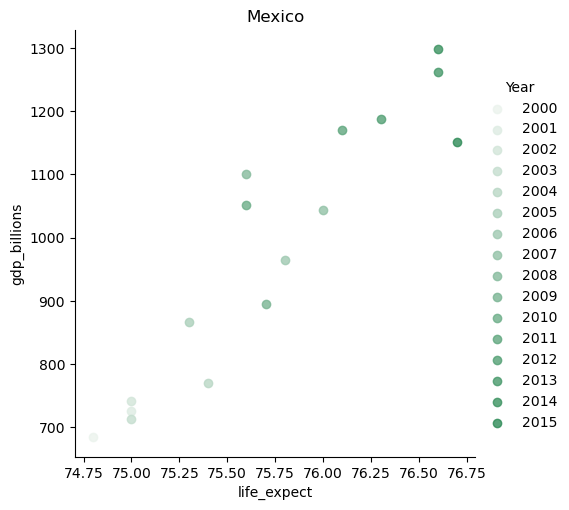

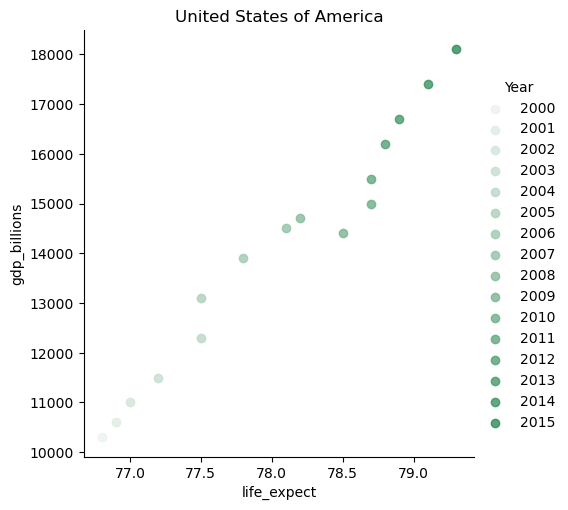

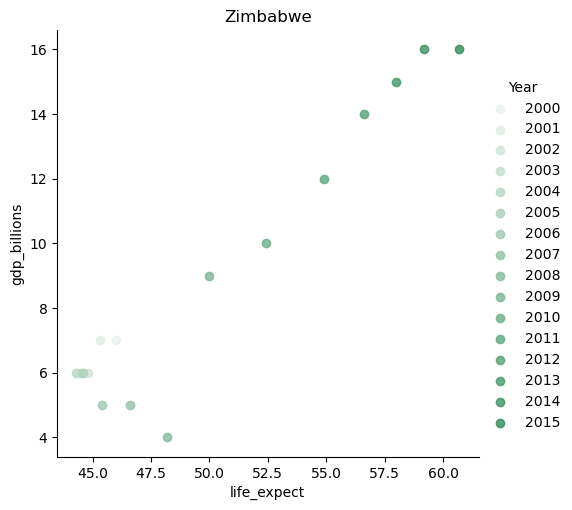

In [6]:
countries = data['Country'].unique()
color_palette = sns.light_palette("seagreen", n_colors = 16)
for country in countries:
    line1 = sns.lmplot(x = 'life_expect', y = 'gdp_billions', data = data[data['Country'] == country],
                       hue = 'Year' , palette = color_palette)
    plt.title(country)
    plt.show()



Check data distribiuon with histogram of all GDP and all Life expectancy

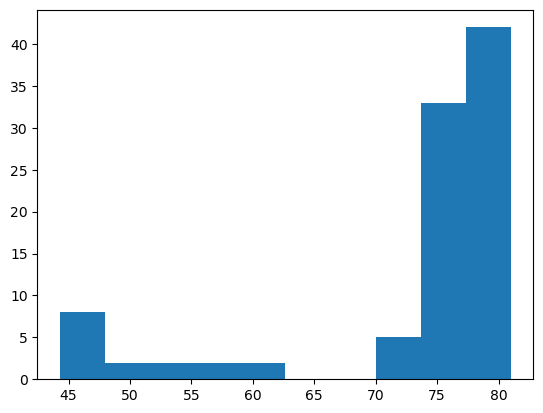

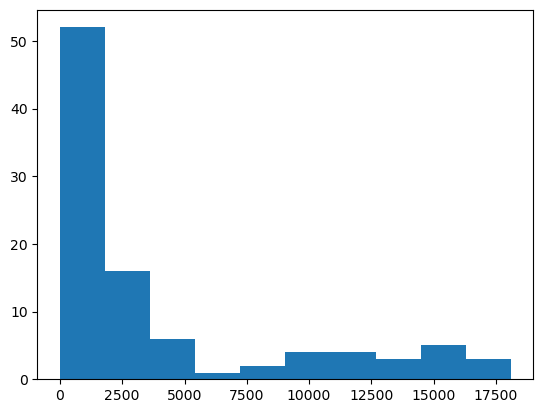

<Figure size 640x480 with 0 Axes>

In [8]:
#print(data.head())

plt.hist(data.life_expect)
plt.show()
plt.clf()
plt.hist(data.gdp_billions)
plt.show()
plt.clf()


Data Analysis:

Is GDP and life expectancy correlated?

Null hypo: There is no sigficant correlation between life expectancy and gdp.
Alt hypo:  There is a significant positive correlation between a country's GDP and life expectancy.

Given that life expectancy is not related to gdp, how likely is it that we see the increase in LE as GDP rises?

Correlation Coefficient
P value
t-test
significant results?



Correlation Coefficient:  0.343
P-value:  0.00062
3880.4895833333335
51
45


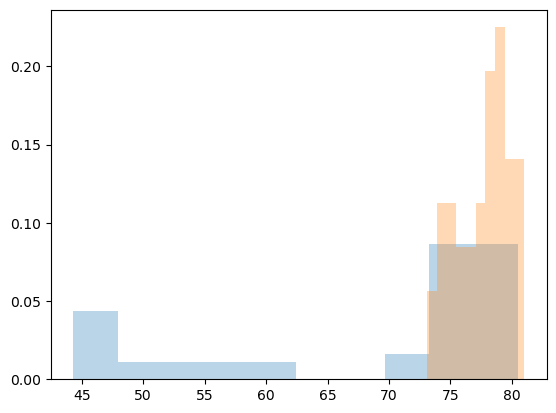

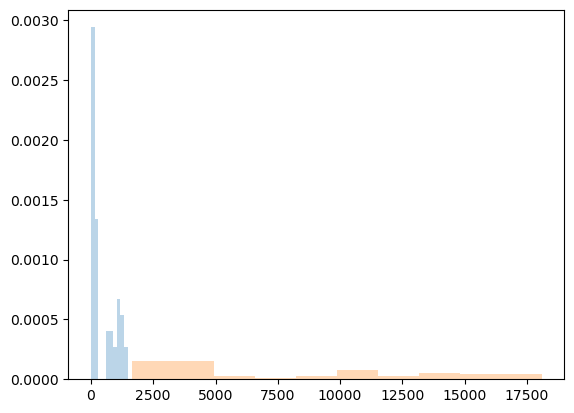

pval:  0.0000113
t stat: -4.639999113101494


<Figure size 640x480 with 0 Axes>

In [9]:
#p-value - Chance of observing the correlation in the data by chance if there is no correlation in reality
#Cor_coef - how strong is the correlation and pos or negative
cor_coef, p_value = stats.pearsonr(data.gdp_billions, data.life_expect)

print('Correlation Coefficient: ', round(cor_coef, 3))
print('P-value: ', round(p_value, 5))

#Is there a significant difference in life expectancy between low and high GDP?

print(data.gdp_billions.mean())

low_gdp = data[data.gdp_billions <= 1500]
high_gdp = data[data.gdp_billions > 1500]
print(low_gdp.life_expect.count())
print(high_gdp.life_expect.count())

plt.hist(low_gdp.life_expect, alpha = 0.3, density=True)
plt.hist(high_gdp.life_expect, alpha = 0.3, density=True)
plt.show()
plt.clf()
plt.hist(low_gdp.gdp_billions, alpha = 0.3, density=True)
plt.hist(high_gdp.gdp_billions, alpha = 0.3, density=True)
plt.show()
plt.clf()


tstat, pval = stats.ttest_ind(low_gdp.life_expect, high_gdp.life_expect)
#a pval below 0.05 indicates there is a significant correlation between gdp and life expectancy
print('pval: ', '{:.7f}'.format(pval))
#is there a statistically significant difference between the mean life expect of low and high gdp?
print('t stat:', tstat)

Is there a correlation between GDP and life expectancy for all data?

A correlation coeffficient of 0.34 indicates a relatively weak positive correlation between gdp and life expectancy.

A p value of 0.00062 indicates a statistically significant chance this correlation is not due to random chance due to sample selection

Is there a correlation between GDP and life expectancy in countries with a high gdp and low gdp?

P value of 0.00001 indicated a statistically significant result, meaning there appears to be a positive corelation between 
life expectancy in low gdp and high gdp countries

A t statistic of -4.6 indicates the mean life expectancy in low gdp countries is substantially lower than in high gdp countries.


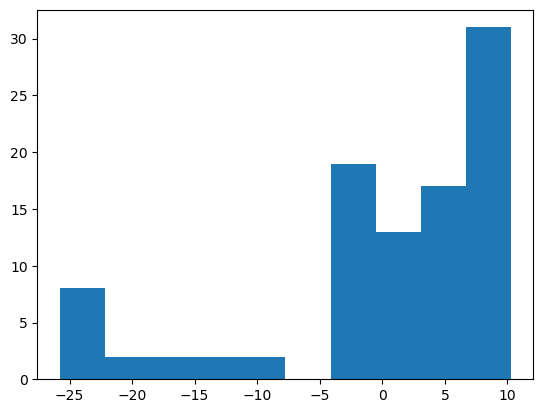

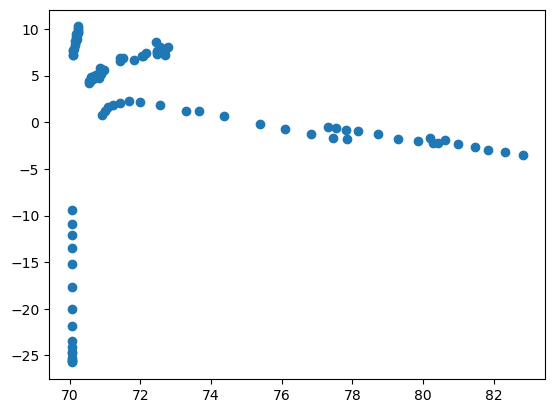

<Figure size 640x480 with 0 Axes>

In [11]:
import statsmodels.api as sm

model = sm.OLS.from_formula('life_expect~gdp_billions', data = data)
results = model.fit()

# Calculate fitted values
fitted_values = results.predict(data)
#print(fitted_values.head())
# Calculate residuals
residuals = data.life_expect - fitted_values 
#print(residuals)
# Check normality assumption
plt.hist(residuals)

# Show then clear the plot
plt.show()
plt.clf()

# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()



Based on the data inspection above, it appears the data is not normally distributed and to not be homoscedastic so the tests I learned shouldn't be applied to the data as a whole. 

Perhaps I can do the analysis for individual countries instead?

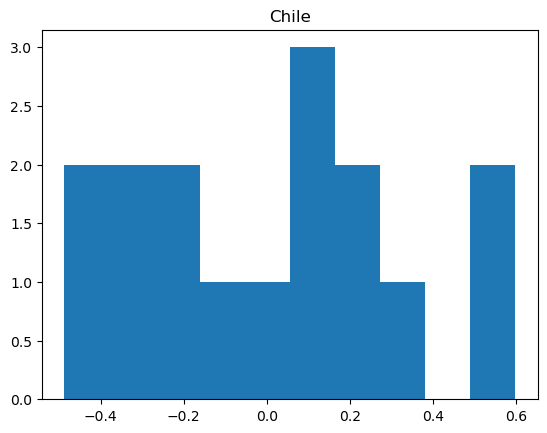

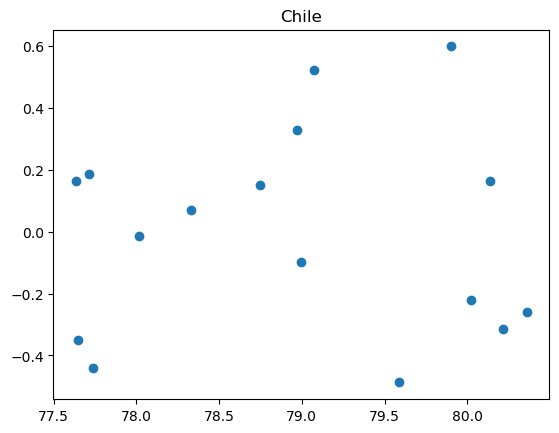

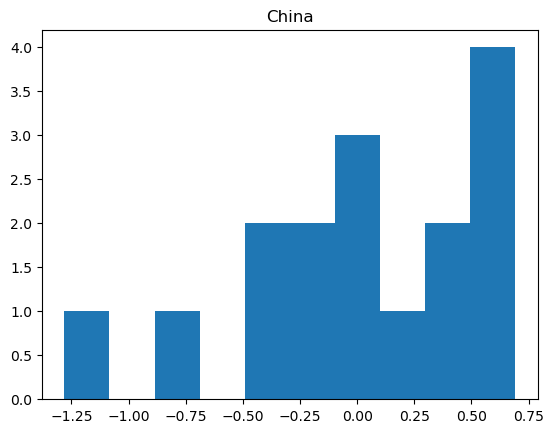

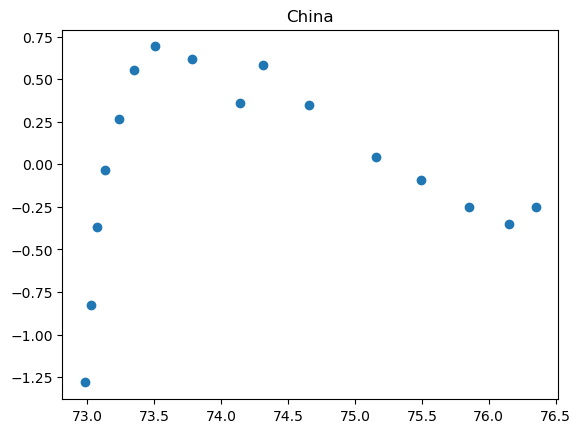

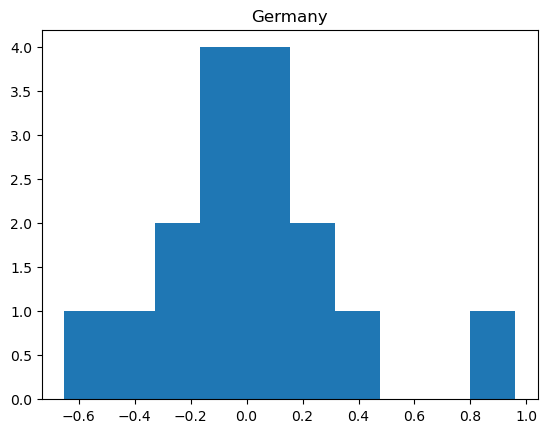

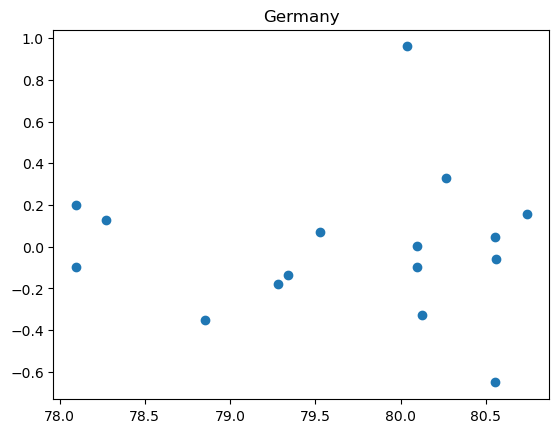

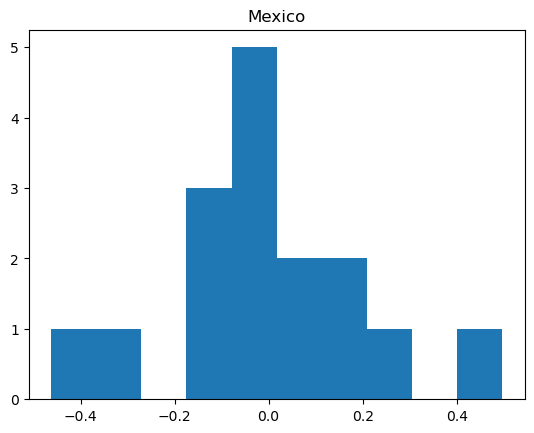

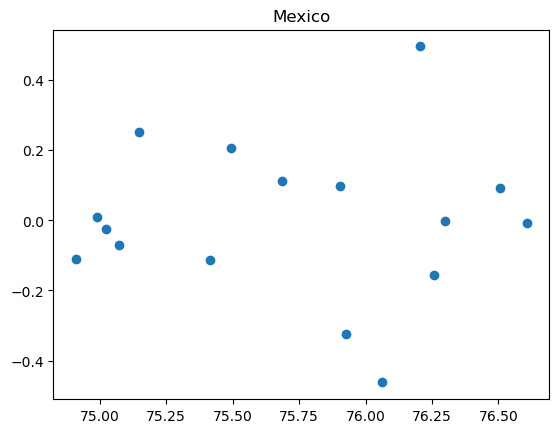

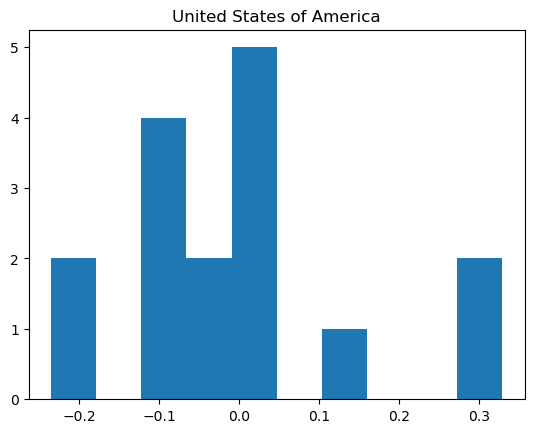

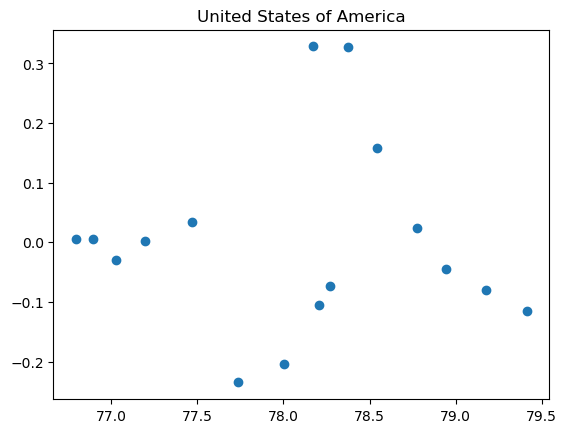

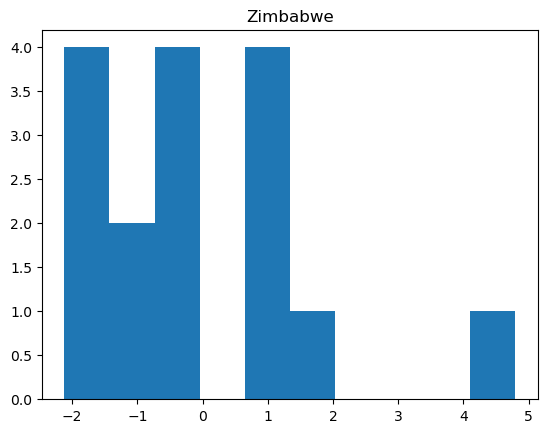

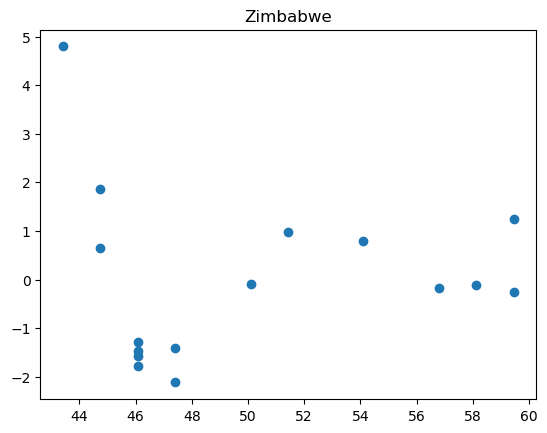

<Figure size 640x480 with 0 Axes>

In [12]:
#loop through each country to determine if this data can be used for inferential statistics
for country in countries:
    country_data = data[data['Country'] == country]
    
    model = sm.OLS.from_formula('life_expect~gdp_billions', data = country_data)
    results = model.fit()
    
    # Calculate fitted values
    fitted_values = results.predict(country_data)
    #print(fitted_values.head())
    # Calculate residuals
    residuals = country_data.life_expect - fitted_values 
    #print(residuals)
    # Check normality assumption
    plt.hist(residuals)
    plt.title(country)

    # Show then clear the plot
    plt.show()
    plt.clf()

    # Check homoscedasticity assumption
    plt.scatter(fitted_values, residuals)
    plt.title(country)
    plt.show()
    plt.clf()

Data looks at least somewhat normal and homoscedastic: Chile, Germany, Mexico, USA

not: China, zimbabwe

In [13]:
normal_dist_countries = ['Chile', 'Germany', 'United States of America', 'Mexico']

for country in normal_dist_countries:
    country_data = data[data['Country'] == country]
    #p-value - Chance of observing the correlation in the data by chance if there is no correlation in reality
    #Cor_coef - how strong is the correlation and pos or negative
    cor_coef, p_value = stats.pearsonr(country_data.gdp_billions, country_data.life_expect)

    print('Correlation Coefficient: ', round(cor_coef, 3))
    print('P-value: ', round(p_value, 5))
    print(p_value)



Correlation Coefficient:  0.95
P-value:  0.0
1.790011068458869e-08
Correlation Coefficient:  0.933
P-value:  0.0
1.391770754192456e-07
Correlation Coefficient:  0.982
P-value:  0.0
1.7499709269099464e-11
Correlation Coefficient:  0.932
P-value:  0.0
1.4759822742343945e-07


CONCLUSION

Based on these numbers and the scatter charts with GPD and Life expectancy per country plotted above, there
appears to be a very strong positive correlation between GDP and life expectancy. 